In [5]:
import pandas as pd
import dask.dataframe as dd

dtypes = {'my_tags': 'object'}

animelists_dask = dd.read_csv('./datasets/animelists_cleaned.csv', dtype=dtypes)
animelists = animelists_dask.compute()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

animes = pd.read_csv('./datasets/anime_cleaned.csv')
users = pd.read_csv('./datasets/users_cleaned.csv')


In [9]:
# Limpieza de Anime
animes['aired_from_year'] = animes['aired_from_year'].astype(int)
animes['duration_min'] = animes['duration_min'].astype(int)

try:
    animes = animes.drop(columns=['title_japanese', 'title_synonyms', 'image_url', 'status', 'aired_string', 'duration', 'background'])
except KeyError:
    pass

# Limpieza de Users
users['user_days_spent_watching'] = users['user_days_spent_watching'].astype(int)
users['join_date'] = users['join_date'].astype(str).str[:10]
users['last_online'] = users['last_online'].astype(str).str[:10]

try:
    users['birth_date'] = users['birth_date'].astype(str).str[:4]
    users['birth_date'] = 2018 - users['birth_date'].astype(int)
    users.rename(columns={'birth_date': 'age'}, inplace=True)
    users = users.drop(columns='access_rank')
except KeyError:
    pass


In [11]:
# Limpieza de AnimeLists

animelists['my_last_updated'] = animelists['my_last_updated'].astype(str).str[:10]

try:
    animelists = animelists.drop(columns=['my_rewatching', 'my_rewatching_ep', 'my_tags', 'my_start_date', 'my_finish_date'])
except KeyError: 
    pass


In [13]:
animes.head()

,anime_id,title,title_english,type,source,episodes,airing,aired,rating,score,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,TV,Manga,12,False,"{'from': '2012-01-13', 'to': '2012-03-30'}",PG-13 - Teens 13 or older,7.63,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24,2012
1,2104,Seto no Hanayome,My Bride is a Mermaid,TV,Manga,26,False,"{'from': '2007-04-02', 'to': '2007-10-01'}",PG-13 - Teens 13 or older,7.89,...,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24,2007
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,TV,Manga,51,False,"{'from': '2008-10-04', 'to': '2009-09-25'}",PG - Children,7.55,...,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24,2008
3,721,Princess Tutu,Princess Tutu,TV,Original,38,False,"{'from': '2002-08-16', 'to': '2003-05-23'}",PG-13 - Teens 13 or older,8.21,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16,2002
4,12365,Bakuman. 3rd Season,Bakuman.,TV,Manga,25,False,"{'from': '2012-10-06', 'to': '2013-03-30'}",PG-13 - Teens 13 or older,8.67,...,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24,2012


In [24]:
users.head()

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,age,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55,Female,"Chennai, India",28,2013-03-03,2014-02-04,7.43,0.0,3391
1,Damonashu,37326,45,195,27,25,59,82,Male,"Detroit,Michigan",27,2008-02-13,2017-07-10,6.15,6.0,4903
2,bskai,228342,25,414,2,5,11,159,Male,"Nayarit, Mexico",28,2009-08-31,2014-05-12,8.27,1.0,9701
3,terune_uzumaki,327311,5,5,0,0,0,11,Female,"Malaysia, Kuantan",20,2010-05-10,2012-10-18,9.70,6.0,697
4,Bas_G,5015094,35,114,6,20,175,30,Male,"Nijmegen, Nederland",19,2015-11-26,2018-05-10,7.86,0.0,1847


In [60]:
animelists.head()

,username,anime_id,my_watched_episodes,my_score,my_status,my_last_updated
0,karthiga,21,586,9,1,2013-03-03
1,karthiga,59,26,7,2,2013-03-10
2,karthiga,74,26,7,2,2013-04-27
3,karthiga,120,26,7,2,2013-03-03
4,karthiga,178,26,7,2,2013-03-27


In [56]:
animelists_my_watched_episodes = animelists.drop(columns=['my_score','my_status','my_last_updated'])
animelists_my_score = animelists.drop(columns=['my_watched_episodes','my_status','my_last_updated'])
animelists_my_status = animelists.drop(columns=['my_watched_episodes','my_score','my_last_updated'])
animelists_my_last_updated = animelists.drop(columns=['my_watched_episodes','my_score','my_status'])
animelists_users_animes = animelists.drop(columns=['my_watched_episodes','my_score','my_status', 'my_last_updated'])

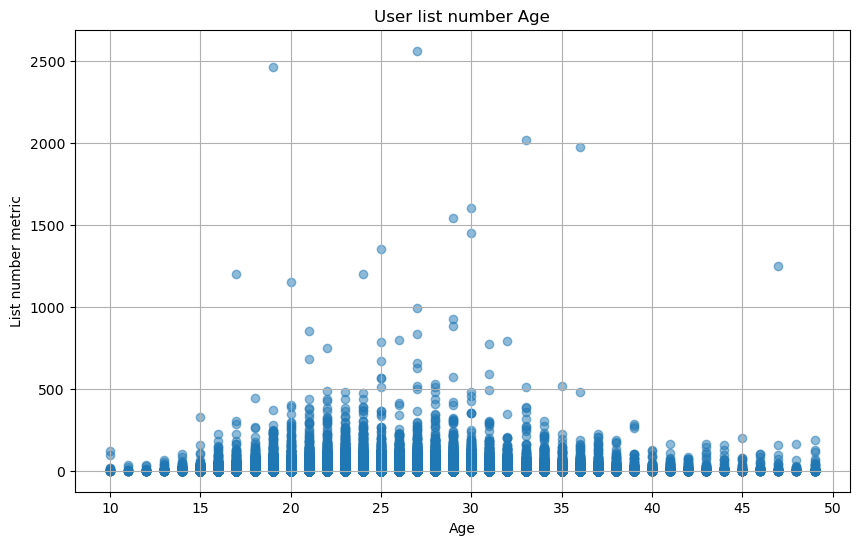

In [54]:
import matplotlib.pyplot as plt

column_to_plot = 'user_onhold'

# Drop rows with missing values in 'age' or 'user_days_spent_watching' columns
users_df = users.dropna(subset=['age', column_to_plot])

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(users_df['age'], users_df[column_to_plot], alpha=0.5)
plt.title('User list number Age')
plt.xlabel('Age')
plt.ylabel('List number metric')
plt.grid(True)
plt.show()
